<a href="https://colab.research.google.com/github/MalekBEKRI97/ComponentEditor/blob/master/F_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data

### Importing Libraries

In [2]:
import pandas

### Data Loading

In [5]:
#dataset = pandas.read_csv('pokedex.csv')
dataset = pandas.read_csv('https://raw.githubusercontent.com/elyesmanai/Datasets-for-ML-trainings/main/pokedex_(Update_05.20).csv')
# there's differents functions for different extensions

### Exploratory Data Analysis (EDA)

In [6]:
dataset.shape #number of rows and columns

(1028, 51)

In [7]:
dataset.columns # names of columns

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

In [8]:
dataset.head() # first rows (5 by default)
dataset.tail() # last rows (5 by default)
dataset.sample() # random rows (1 by default)

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
875,875,749,Mudbray,Pampuli,ドロバンコ (Dorobanko),7,Normal,Donkey Pokémon,1,Ground,NaN,1.0,110.0,3,Own Tempo,Stamina,Inner Focus,385.0,70.0,100.0,70.0,45.0,55.0,45.0,190.0,70.0,77.0,Medium Fast,1,Field,NaN,50.0,20.0,1.0,1.0,2.0,0.0,2.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0


In [9]:
dataset.iloc[0] # returns row with id of 0

Unnamed: 0                            0
pokedex_number                        1
name                          Bulbasaur
german_name                     Bisasam
japanese_name       フシギダネ (Fushigidane)
generation                            1
status                           Normal
species                    Seed Pokémon
type_number                           2
type_1                            Grass
type_2                           Poison
height_m                            0.7
weight_kg                           6.9
abilities_number                      2
ability_1                      Overgrow
ability_2                           NaN
ability_hidden              Chlorophyll
total_points                        318
hp                                   45
attack                               49
defense                              49
sp_attack                            65
sp_defense                           65
speed                                45
catch_rate                           45


In [ ]:
dataset["name"] # returns column values

In [ ]:
dataset.info() 
# many columns have missing data
# all columns are correctly typed
# memory size is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   uint8  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [10]:
# generation has 8 unique values > 0 --> cast to unit8
dataset['generation'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
#casting generatin to uint8
dataset['generation'] = dataset['generation'].astype("uint8")

In [ ]:
dataset.describe() #possibility of outlier in height_m and weight_kg

,Unnamed: 0,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,egg_type_number,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,924.000000,924.000000,924.000000,1028.000000,792.000000,1027.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,513.500000,437.711089,4.034047,1.527237,1.368093,69.753749,2.284047,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047,93.172078,64.139610,153.814935,1.271401,55.003157,30.316456,0.868434,1.125486,1.053502,1.034290,1.004134,1.196498,1.078794,0.952335,1.084630,1.166342,0.979329,0.992461,1.239786,1.010700,0.975681,1.065661,0.980302,1.084874
std,296.902341,259.366480,2.234937,0.499501,3.380126,129.221230,0.794981,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103,75.240630,21.455464,79.270628,0.451417,20.182675,28.942912,0.286236,0.717742,0.613411,0.645167,0.748527,0.759471,0.754969,0.542982,0.784937,0.593030,0.499146,0.598301,0.699156,0.558533,0.377549,0.451054,0.503434,0.527743
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,36.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,256.750000,213.750000,2.000000,1.000000,0.600000,8.800000,2.000000,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,70.000000,67.000000,1.000000,50.000000,20.000000,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,513.500000,433.500000,4.000000,2.000000,1.000000,28.500000,2.000000,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000,60.000000,70.000000,159.000000,1.000000,50.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,770.250000,663.250000,6.000000,2.000000,1.500000,69.100000,3.000000,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,70.000000,201.500000,2.000000,50.000000,25.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.625000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1027.000000,890.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000,255.000000,140.000000,608.000000,2.000000,100.000000,120.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


In [ ]:
type(dataset) # DataFrame
type(dataset['height_m']) # Series
type(dataset['height_m'].values) # array

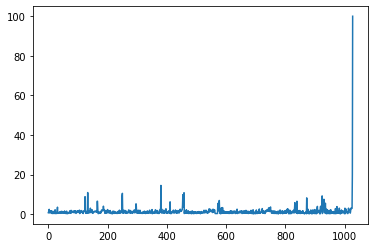

In [ ]:
dataset['height_m'].plot() 
# Outlier in height_m (100m)
# weight: no outlier

In [ ]:
# Filtering (conditional selection)
dataset[ dataset['height_m'] > 90 ]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [ ]:
dataset[ dataset['species'] == "Gigantic Pokémon"]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


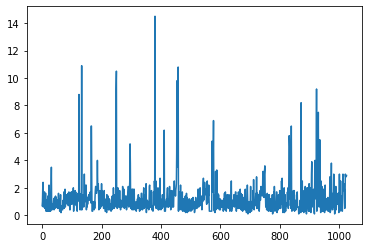

In [ ]:
dataset[ dataset['height_m'] < 20 ]['height_m'].plot()

In [ ]:
tall_legendary_pokemons = dataset[ (dataset['height_m'] > 10) & (dataset['status'] == "Legendary") & ()]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
458,458,384,Mega Rayquaza,Rayquaza,レックウザ (Rayquaza),3,Legendary,Sky High Pokémon,2,Dragon,Flying,10.8,392.0,1,Delta Stream,NaN,NaN,780.0,105.0,180.0,100.0,180.0,100.0,115.0,3.0,0.0,351.0,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,1.0,0.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,1.0,2.0
1026,1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,20.0,950.0,1,Pressure,NaN,NaN,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,100.0,NaN,0,NaN,NaN,NaN,1125.0,255.0,115.0,250.0,125.0,250.0,130.0,NaN,NaN,NaN,Slow,1,Undiscovered,NaN,NaN,120.0,1.0,0.5,0.5,0.5,0.25,2.0,0.5,0.5,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
